# Python 中級練習問題 30題

このノートブックは、NumPy・Pandas・Matplotlib・Seaborn・SciPy・Scikit-learn の中級チュートリアルに基づいた練習問題集です。

## 対象者
- 各ライブラリの基礎を習得済みの方
- より実践的なデータ分析・機械学習スキルを身につけたい方

## 問題構成
- **問題 1-5**: NumPy 中級（線形代数、高度な配列操作）
- **問題 6-10**: Pandas 中級（groupby、結合、時系列）
- **問題 11-15**: Matplotlib 中級（サブプロット、カスタマイズ）
- **問題 16-19**: Seaborn 中級（FacetGrid、統計的可視化）
- **問題 20-24**: SciPy 統計（仮説検定、相関分析）
- **問題 25-30**: Scikit-learn 中級（アンサンブル、チューニング、クラスタリング）

## 0. 環境準備（JupyterLite 用）

In [1]:
# JupyterLite 用のパッケージインストール
try:
    import piplite
    await piplite.install(["numpy", "pandas", "matplotlib", "seaborn", "scipy", "scikit-learn"])
except ImportError:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 乱数シードの固定
np.random.seed(42)

print("環境準備完了！")

環境準備完了！


---
# NumPy 中級（問題 1-5）

## 問題 1: 線形代数 - 連立方程式

以下の連立方程式を `np.linalg.solve()` を使って解きなさい。

```
2x + 3y - z = 1
4x + y + 2z = 2
3x + 2y + 3z = 3
```

1. 係数行列 A と定数ベクトル b を作成する
2. 連立方程式を解いて x, y, z の値を求める
3. 検算として A @ x が b と等しいことを確認する

In [2]:
# 問題 1 の解答欄


## 問題 2: 固有値と固有ベクトル

以下の行列の固有値と固有ベクトルを求めなさい。

```python
A = np.array([[4, -2],
              [1,  1]])
```

1. `np.linalg.eig()` で固有値と固有ベクトルを計算する
2. 各固有値について Av = λv が成り立つことを検証する
3. 固有値の和がトレース（対角成分の和）と等しいことを確認する

In [3]:
# 問題 2 の解答欄
A = np.array([[4, -2],
              [1,  1]])


## 問題 3: 高度なインデックス操作

以下の配列に対して `np.where()` と `np.select()` を使った条件処理を行いなさい。

```python
scores = np.array([45, 62, 78, 55, 91, 38, 85, 72, 67, 50])
```

1. `np.where()` を使って、60点以上なら「合格」、未満なら「不合格」のラベルを作成する
2. `np.select()` を使って、以下の成績評価を行う配列を作成する
   - 90点以上: 'A'
   - 80点以上: 'B'
   - 70点以上: 'C'
   - 60点以上: 'D'
   - 60点未満: 'F'
3. 各成績の人数を数える

In [4]:
# 問題 3 の解答欄
scores = np.array([45, 62, 78, 55, 91, 38, 85, 72, 67, 50])


## 問題 4: ブロードキャストと外積

ブロードキャストを活用して以下の計算を行いなさい。

1. 1次元配列 `a = [1, 2, 3]` と `b = [10, 20, 30, 40]` の外積（すべての組み合わせの積）を計算する
2. 各行から行ごとの平均を引いた「中心化」行列を作成する（元データは下記）
3. 標準化（各列を平均0、標準偏差1に変換）を行う

```python
data = np.array([[10, 200, 3000],
                 [20, 400, 6000],
                 [30, 600, 9000],
                 [40, 800, 12000]])
```

In [5]:
# 問題 4 の解答欄


## 問題 5: 乱数生成（新API）とベクトル化

1. `np.random.default_rng(seed=123)` で Generator を作成する
2. 平均 0、標準偏差 1 の正規分布から 10000 個のサンプルを生成する
3. ベクトル化を使って、各サンプルに対して以下のカスタム関数を適用する:
   - x < -1 なら -1
   - -1 <= x <= 1 なら x
   - x > 1 なら 1
4. 変換前後のヒストグラムを並べて表示する

In [6]:
# 問題 5 の解答欄


---
# Pandas 中級（問題 6-10）

## 問題 6: groupby と agg

以下の売上データを使って集計を行いなさい。

```python
sales_df = pd.DataFrame({
    '店舗': ['東京', '大阪', '東京', '名古屋', '大阪', '東京', '名古屋', '大阪'],
    'カテゴリ': ['食品', '食品', '飲料', '食品', '飲料', '日用品', '飲料', '日用品'],
    '売上': [15000, 12000, 8000, 9000, 11000, 7000, 6000, 9500],
    '客数': [150, 100, 80, 90, 120, 70, 60, 85]
})
```

1. 店舗ごとの売上合計と平均を計算する
2. 店舗×カテゴリごとの売上合計をピボット形式で表示する
3. `agg()` を使って、店舗ごとに売上の合計・平均・最大値、客数の合計を一度に計算する
4. `transform()` を使って、各行に「その店舗の平均売上」を追加する

In [7]:
# 問題 6 の解答欄
sales_df = pd.DataFrame({
    '店舗': ['東京', '大阪', '東京', '名古屋', '大阪', '東京', '名古屋', '大阪'],
    'カテゴリ': ['食品', '食品', '飲料', '食品', '飲料', '日用品', '飲料', '日用品'],
    '売上': [15000, 12000, 8000, 9000, 11000, 7000, 6000, 9500],
    '客数': [150, 100, 80, 90, 120, 70, 60, 85]
})


## 問題 7: データの結合（merge）

以下の2つの DataFrame を結合しなさい。

```python
customers = pd.DataFrame({
    '顧客ID': ['C001', 'C002', 'C003', 'C004'],
    '氏名': ['田中', '佐藤', '鈴木', '高橋'],
    'ランク': ['Gold', 'Silver', 'Gold', 'Bronze']
})

orders = pd.DataFrame({
    '注文ID': ['O001', 'O002', 'O003', 'O004', 'O005'],
    '顧客ID': ['C001', 'C002', 'C001', 'C005', 'C003'],
    '金額': [5000, 3000, 8000, 2000, 6000]
})
```

1. inner join で結合する（両方に存在する顧客のみ）
2. left join で結合する（注文データを基準に）
3. 結合後、ランクごとの購入金額合計を計算する
4. 顧客マスタに存在しない顧客ID（C005）の注文を抽出する

In [8]:
# 問題 7 の解答欄
customers = pd.DataFrame({
    '顧客ID': ['C001', 'C002', 'C003', 'C004'],
    '氏名': ['田中', '佐藤', '鈴木', '高橋'],
    'ランク': ['Gold', 'Silver', 'Gold', 'Bronze']
})

orders = pd.DataFrame({
    '注文ID': ['O001', 'O002', 'O003', 'O004', 'O005'],
    '顧客ID': ['C001', 'C002', 'C001', 'C005', 'C003'],
    '金額': [5000, 3000, 8000, 2000, 6000]
})


## 問題 8: 欠損値の処理

以下の欠損値を含むデータを処理しなさい。

```python
df_missing = pd.DataFrame({
    '部門': ['営業', '営業', '技術', '技術', '営業', '技術'],
    '売上': [100, np.nan, 150, 200, 120, np.nan],
    '評価': [4, 3, np.nan, 5, np.nan, 4]
})
```

1. 欠損値の数を列ごとに確認する
2. 売上の欠損値を「部門ごとの平均」で補完する
3. 評価の欠損値を「全体の中央値」で補完する
4. 補完後のデータを表示する

In [9]:
# 問題 8 の解答欄
df_missing = pd.DataFrame({
    '部門': ['営業', '営業', '技術', '技術', '営業', '技術'],
    '売上': [100, np.nan, 150, 200, 120, np.nan],
    '評価': [4, 3, np.nan, 5, np.nan, 4]
})


## 問題 9: 時系列データの処理

以下の日次売上データを処理しなさい。

```python
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=90, freq='D')
daily_sales = pd.DataFrame({
    '日付': dates,
    '売上': np.random.randint(80000, 150000, 90)
})
daily_sales = daily_sales.set_index('日付')
```

1. 週次（W）にリサンプリングして売上合計を計算する
2. 月次（ME）にリサンプリングして売上合計と平均を計算する
3. 7日間の移動平均を計算する
4. 日次売上と7日間移動平均を同じグラフにプロットする

In [10]:
# 問題 9 の解答欄
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=90, freq='D')
daily_sales = pd.DataFrame({
    '日付': dates,
    '売上': np.random.randint(80000, 150000, 90)
})
daily_sales = daily_sales.set_index('日付')


## 問題 10: apply と cut

以下のデータに対して `apply()` と `cut()` を使った変換を行いなさい。

```python
employees = pd.DataFrame({
    '名前': ['田中', '佐藤', '鈴木', '高橋', '伊藤', '渡辺'],
    '年齢': [25, 32, 45, 28, 55, 38],
    '年収': [350, 480, 720, 400, 850, 550]
})
```

1. `apply()` を使って、年収を「万円」から「千円」単位に変換した列を追加する
2. `pd.cut()` を使って、年齢を「20代」「30代」「40代」「50代以上」に分類する
3. `pd.qcut()` を使って、年収を3等分（低・中・高）に分類する
4. 年代ごとの平均年収を計算する

In [11]:
# 問題 10 の解答欄
employees = pd.DataFrame({
    '名前': ['田中', '佐藤', '鈴木', '高橋', '伊藤', '渡辺'],
    '年齢': [25, 32, 45, 28, 55, 38],
    '年収': [350, 480, 720, 400, 850, 550]
})


---
# Matplotlib 中級（問題 11-15）

## 問題 11: サブプロットとオブジェクト指向スタイル

オブジェクト指向スタイルを使って、2行2列のサブプロットを作成しなさい。

```python
x = np.linspace(0, 2 * np.pi, 100)
```

1. 左上: sin(x) の折れ線グラフ
2. 右上: cos(x) の折れ線グラフ
3. 左下: sin(x) * cos(x) の折れ線グラフ
4. 右下: sin(x)² + cos(x)² の折れ線グラフ（常に1になることを確認）

各グラフにタイトル、軸ラベル、グリッドを設定すること。

In [12]:
# 問題 11 の解答欄
x = np.linspace(0, 2 * np.pi, 100)


## 問題 12: GridSpec による不規則なレイアウト

`GridSpec` を使って以下のレイアウトを作成しなさい。

- 上段: 横長のメイングラフ（3列分）
- 下段: 3つの小さなグラフ（各1列分）

データ:
```python
np.random.seed(42)
main_data = np.random.randn(100).cumsum()
hist_data = np.random.randn(500)
bar_data = [25, 40, 30, 35, 45]
pie_data = [30, 25, 20, 15, 10]
```

上段にmain_dataの折れ線グラフ、下段左にヒストグラム、下段中央に棒グラフ、下段右に円グラフを配置する。

In [13]:
# 問題 12 の解答欄
from matplotlib.gridspec import GridSpec

np.random.seed(42)
main_data = np.random.randn(100).cumsum()
hist_data = np.random.randn(500)
bar_data = [25, 40, 30, 35, 45]
pie_data = [30, 25, 20, 15, 10]


## 問題 13: 2軸グラフ

`twinx()` を使って、左右に異なるy軸を持つグラフを作成しなさい。

```python
months = ['1月', '2月', '3月', '4月', '5月', '6月']
sales = [120, 150, 180, 160, 200, 220]  # 売上（万円）
visitors = [1200, 1500, 1800, 1600, 2000, 2200]  # 来客数
```

1. 左y軸に売上（棒グラフ）を表示する
2. 右y軸に来客数（折れ線グラフ）を表示する
3. 適切な色分け、軸ラベル、凡例を設定する

In [14]:
# 問題 13 の解答欄
months = ['1月', '2月', '3月', '4月', '5月', '6月']
sales = [120, 150, 180, 160, 200, 220]
visitors = [1200, 1500, 1800, 1600, 2000, 2200]


## 問題 14: 注釈と装飾

以下のデータを使って、注釈付きのグラフを作成しなさい。

```python
np.random.seed(42)
x = np.arange(20)
y = np.random.randn(20).cumsum()
```

1. 折れ線グラフを描く
2. 最大値の点に矢印付きの注釈「最大値」を追加する
3. 最小値の点に矢印付きの注釈「最小値」を追加する
4. y=0 の位置に水平の破線を追加する
5. 平均値の位置に水平線と ±1標準偏差の帯を追加する

In [15]:
# 問題 14 の解答欄
np.random.seed(42)
x = np.arange(20)
y = np.random.randn(20).cumsum()


## 問題 15: ヒートマップと等高線図

2次元関数を可視化しなさい。

```python
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)
```

1. 左に `pcolormesh` でヒートマップを描く
2. 右に `contour` と `contourf` を組み合わせた等高線図を描く
3. カラーバーを追加する

In [16]:
# 問題 15 の解答欄
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)


---
# Seaborn 中級（問題 16-19）

## 問題 16: FacetGrid

seaborn の `tips` データセットを使って FacetGrid を作成しなさい。

1. 曜日（day）ごとにパネルを分割したヒストグラム（total_bill）を作成する
2. 性別（sex）を行、喫煙（smoker）を列として total_bill と tip の散布図を作成する
3. time で色分けして凡例を追加する

In [17]:
# 問題 16 の解答欄
tips = sns.load_dataset('tips')


## 問題 17: PairGrid と JointGrid

iris データセットを使って以下を作成しなさい。

1. `PairGrid` で散布図行列を作成する
   - 対角線: ヒストグラム
   - 上三角: 散布図
   - 下三角: KDE
   - species で色分け

2. `JointGrid` で sepal_length と sepal_width の関係を可視化する
   - 中央: KDE の等高線
   - 周辺: ヒストグラム

In [18]:
# 問題 17 の解答欄
iris = sns.load_dataset('iris')


## 問題 18: 統計的推定の可視化

tips データセットを使って、信頼区間付きのグラフを作成しなさい。

1. 曜日ごとのチップ平均と95%信頼区間を棒グラフで表示する
2. 曜日ごとのチップを箱ひげ図とスウォームプロットで重ねて表示する
3. time と sex でグループ化した pointplot を作成する

In [19]:
# 問題 18 の解答欄


## 問題 19: ヒートマップとクラスターマップ

1. tips データセットの数値列の相関行列をヒートマップで可視化する
2. flights データセットをピボットして、月×年のヒートマップを作成する
3. （オプション）flights データで clustermap を作成する

In [20]:
# 問題 19 の解答欄
flights = sns.load_dataset('flights')


---
# SciPy 統計（問題 20-24）

## 問題 20: t検定

以下のデータを使って t 検定を行いなさい。

```python
np.random.seed(42)
# 対照群と処理群のテスト点数
control = np.random.normal(70, 10, 30)
treatment = np.random.normal(75, 12, 30)
```

1. 独立2標本 t 検定を実行し、2群の平均に有意差があるか検定する（α=0.05）
2. Welch の t 検定（等分散を仮定しない）も実行して結果を比較する
3. 箱ひげ図で2群を可視化する

In [21]:
# 問題 20 の解答欄
np.random.seed(42)
control = np.random.normal(70, 10, 30)
treatment = np.random.normal(75, 12, 30)


## 問題 21: 対応のあるt検定

同一被験者の訓練前後のデータで対応のある t 検定を行いなさい。

```python
np.random.seed(42)
before = np.random.normal(50, 8, 20)
after = before + np.random.normal(5, 3, 20)  # 平均5点向上
```

1. 対応のある t 検定を実行する
2. 前後の差の平均と95%信頼区間を計算する
3. 前後の変化を線で結んだグラフを作成する

In [22]:
# 問題 21 の解答欄
np.random.seed(42)
before = np.random.normal(50, 8, 20)
after = before + np.random.normal(5, 3, 20)


## 問題 22: カイ二乗検定

以下のクロス集計表について独立性検定を行いなさい。

```python
# 性別と製品選好のクロス集計
observed = np.array([
    [50, 30, 20],  # 男性: 製品A, B, C
    [30, 45, 25]   # 女性: 製品A, B, C
])
```

1. カイ二乗独立性検定を実行する
2. 期待度数を表示する
3. 帰無仮説（性別と製品選好は独立）が棄却されるか判断する（α=0.05）

In [23]:
# 問題 22 の解答欄
observed = np.array([
    [50, 30, 20],
    [30, 45, 25]
])


## 問題 23: 相関分析

以下のデータで相関分析を行いなさい。

```python
np.random.seed(42)
n = 50
study_hours = np.random.uniform(1, 10, n)
scores = 40 + 5 * study_hours + np.random.normal(0, 5, n)
```

1. ピアソンの相関係数と p 値を計算する
2. スピアマンの順位相関係数と p 値を計算する
3. 散布図と回帰直線を描き、相関係数を表示する

In [24]:
# 問題 23 の解答欄
np.random.seed(42)
n = 50
study_hours = np.random.uniform(1, 10, n)
scores = 40 + 5 * study_hours + np.random.normal(0, 5, n)


## 問題 24: 一元配置分散分析（ANOVA）

3つの教授法の効果を比較しなさい。

```python
np.random.seed(42)
method_a = np.random.normal(70, 10, 25)
method_b = np.random.normal(75, 10, 25)
method_c = np.random.normal(80, 10, 25)
```

1. 一元配置分散分析を実行する
2. 効果量（η²）を計算する
3. 3群を箱ひげ図で可視化する
4. 結果の解釈を述べる

In [25]:
# 問題 24 の解答欄
np.random.seed(42)
method_a = np.random.normal(70, 10, 25)
method_b = np.random.normal(75, 10, 25)
method_c = np.random.normal(80, 10, 25)


---
# Scikit-learn 中級（問題 25-30）

## 問題 25: ランダムフォレスト

iris データセットでランダムフォレストを学習しなさい。

1. データを訓練・テストに分割する（7:3）
2. `RandomForestClassifier` で学習する（n_estimators=100）
3. テストデータでの正解率を計算する
4. 特徴量の重要度を棒グラフで可視化する

In [26]:
# 問題 25 の解答欄
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
X, y = iris_data.data, iris_data.target


## 問題 26: グリッドサーチ

SVM のハイパーパラメータを GridSearchCV でチューニングしなさい。

1. iris データセットを使う
2. パラメータグリッドを設定する:
   - C: [0.1, 1, 10]
   - gamma: [0.01, 0.1, 1]
   - kernel: ['rbf', 'linear']
3. 5分割交差検証で最良のパラメータを探す
4. 最良モデルでテストデータを評価する

In [27]:
# 問題 26 の解答欄
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


## 問題 27: パイプライン

前処理とモデルを組み合わせたパイプラインを作成しなさい。

1. wine データセットを使う
2. パイプラインを作成する:
   - StandardScaler で標準化
   - PCA で次元削減（n_components=5）
   - LogisticRegression で分類
3. パイプラインで学習・予測する
4. 正解率を計算する

In [28]:
# 問題 27 の解答欄
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

wine_data = load_wine()


## 問題 28: K-means クラスタリング

クラスタリングを実行し、最適なクラスタ数を探しなさい。

```python
from sklearn.datasets import make_blobs
X_cluster, y_true = make_blobs(n_samples=300, centers=4, random_state=42)
```

1. K=2〜10 で K-means を実行し、エルボー法でイナーシャをプロットする
2. シルエットスコアを計算してプロットする
3. 最適な K を決定し、クラスタリング結果を可視化する

In [29]:
# 問題 28 の解答欄
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster, y_true = make_blobs(n_samples=300, centers=4, random_state=42)


## 問題 29: PCA による次元削減

iris データセットに PCA を適用しなさい。

1. データを標準化する
2. PCA を適用し、各主成分の寄与率を計算する
3. 累積寄与率が95%以上になる主成分数を特定する
4. 2次元に削減したデータを散布図で可視化する（species で色分け）

In [30]:
# 問題 29 の解答欄
from sklearn.decomposition import PCA


## 問題 30: アンサンブル手法の比較

複数のアンサンブル手法を比較しなさい。

1. wine データセットを使う
2. 以下のモデルを交差検証（5分割）で評価する:
   - DecisionTreeClassifier
   - RandomForestClassifier
   - GradientBoostingClassifier
   - AdaBoostClassifier
3. 各モデルの平均スコアと標準偏差を棒グラフで比較する

In [31]:
# 問題 30 の解答欄
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score


## NumPy 中級（問題 1-5）の解答

In [32]:
# 問題 1 の解答
print("=== 問題 1: 連立方程式 ===")

# 1. 係数行列と定数ベクトル
A = np.array([[2, 3, -1],
              [4, 1, 2],
              [3, 2, 3]])
b = np.array([1, 2, 3])

# 2. 連立方程式を解く
x = np.linalg.solve(A, b)
print(f"解: x={x[0]:.4f}, y={x[1]:.4f}, z={x[2]:.4f}")

# 3. 検算
print(f"検算 (A @ x): {A @ x}")
print(f"b: {b}")
print(f"一致: {np.allclose(A @ x, b)}")

=== 問題 1: 連立方程式 ===
解: x=0.0800, y=0.4800, z=0.6000
検算 (A @ x): [1. 2. 3.]
b: [1 2 3]
一致: True


In [33]:
# 問題 2 の解答
print("=== 問題 2: 固有値と固有ベクトル ===")

A = np.array([[4, -2],
              [1,  1]])

# 1. 固有値と固有ベクトル
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"固有値: {eigenvalues}")
print(f"固有ベクトル:\n{eigenvectors}")

# 2. 検証: Av = λv
print("\n検証:")
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    print(f"λ={lam:.2f}: Av={A @ v}, λv={lam * v}")

# 3. 固有値の和 = トレース
print(f"\n固有値の和: {eigenvalues.sum():.4f}")
print(f"トレース: {np.trace(A):.4f}")

=== 問題 2: 固有値と固有ベクトル ===
固有値: [3. 2.]
固有ベクトル:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

検証:
λ=3.00: Av=[2.68328157 1.34164079], λv=[2.68328157 1.34164079]
λ=2.00: Av=[1.41421356 1.41421356], λv=[1.41421356 1.41421356]

固有値の和: 5.0000
トレース: 5.0000


In [34]:
# 問題 3 の解答
print("=== 問題 3: 高度なインデックス操作 ===")

scores = np.array([45, 62, 78, 55, 91, 38, 85, 72, 67, 50])

# 1. np.where で合格/不合格
pass_fail = np.where(scores >= 60, '合格', '不合格')
print(f"点数: {scores}")
print(f"合否: {pass_fail}")

# 2. np.select で成績評価
conditions = [
    scores >= 90,
    scores >= 80,
    scores >= 70,
    scores >= 60
]
choices = ['A', 'B', 'C', 'D']
grades = np.select(conditions, choices, default='F')
print(f"成績: {grades}")

# 3. 各成績の人数
unique, counts = np.unique(grades, return_counts=True)
print("\n成績別人数:")
for g, c in zip(unique, counts):
    print(f"  {g}: {c}人")

=== 問題 3: 高度なインデックス操作 ===
点数: [45 62 78 55 91 38 85 72 67 50]
合否: ['不合格' '合格' '合格' '不合格' '合格' '不合格' '合格' '合格' '合格' '不合格']
成績: ['F' 'D' 'C' 'F' 'A' 'F' 'B' 'C' 'D' 'F']

成績別人数:
  A: 1人
  B: 1人
  C: 2人
  D: 2人
  F: 4人


In [35]:
# 問題 4 の解答
print("=== 問題 4: ブロードキャストと外積 ===")

# 1. 外積
a = np.array([1, 2, 3])
b = np.array([10, 20, 30, 40])
outer = a[:, np.newaxis] * b[np.newaxis, :]
print("外積:")
print(outer)

# 2. 中心化
data = np.array([[10, 200, 3000],
                 [20, 400, 6000],
                 [30, 600, 9000],
                 [40, 800, 12000]])

row_means = data.mean(axis=1, keepdims=True)
centered = data - row_means
print("\n中心化（行ごと）:")
print(centered)

# 3. 標準化（列ごと）
col_means = data.mean(axis=0)
col_stds = data.std(axis=0)
standardized = (data - col_means) / col_stds
print("\n標準化（列ごと）:")
print(standardized)

=== 問題 4: ブロードキャストと外積 ===
外積:
[[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]]

中心化（行ごと）:
[[-1060.  -870.  1930.]
 [-2120. -1740.  3860.]
 [-3180. -2610.  5790.]
 [-4240. -3480.  7720.]]

標準化（列ごと）:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


=== 問題 5: 乱数生成とベクトル化 ===
元データ: 平均=0.0082, 標準偏差=0.9965
クリップ後: 平均=0.0077, 標準偏差=0.7187


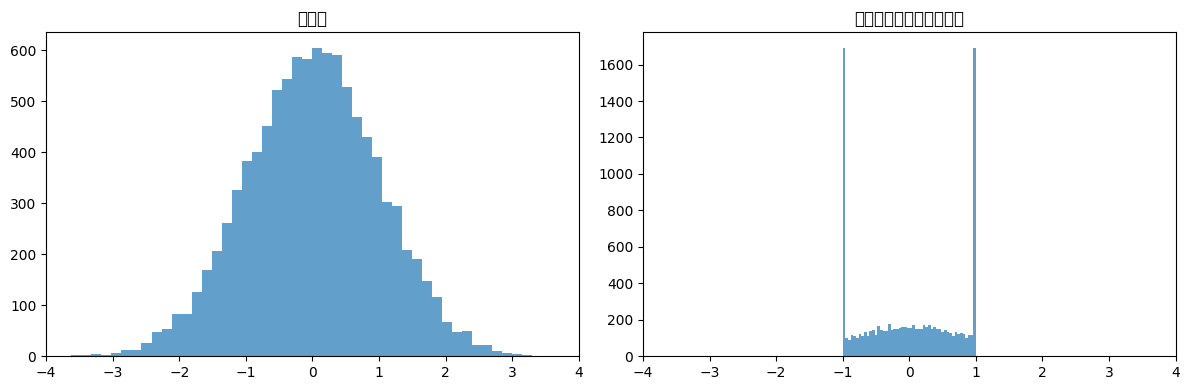

In [36]:
# 問題 5 の解答
print("=== 問題 5: 乱数生成とベクトル化 ===")

# 1. Generator
rng = np.random.default_rng(seed=123)

# 2. サンプル生成
samples = rng.standard_normal(10000)

# 3. クリッピング（ベクトル化）
clipped = np.clip(samples, -1, 1)

print(f"元データ: 平均={samples.mean():.4f}, 標準偏差={samples.std():.4f}")
print(f"クリップ後: 平均={clipped.mean():.4f}, 標準偏差={clipped.std():.4f}")

# 4. 可視化
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(samples, bins=50, alpha=0.7)
axes[0].set_title('変換前')
axes[0].set_xlim(-4, 4)

axes[1].hist(clipped, bins=50, alpha=0.7)
axes[1].set_title('変換後（クリッピング）')
axes[1].set_xlim(-4, 4)

plt.tight_layout()
plt.show()

## Pandas 中級（問題 6-10）の解答

In [37]:
# 問題 6 の解答
print("=== 問題 6: groupby と agg ===")

sales_df = pd.DataFrame({
    '店舗': ['東京', '大阪', '東京', '名古屋', '大阪', '東京', '名古屋', '大阪'],
    'カテゴリ': ['食品', '食品', '飲料', '食品', '飲料', '日用品', '飲料', '日用品'],
    '売上': [15000, 12000, 8000, 9000, 11000, 7000, 6000, 9500],
    '客数': [150, 100, 80, 90, 120, 70, 60, 85]
})

# 1. 店舗ごとの売上合計と平均
print("店舗ごとの売上:")
print(sales_df.groupby('店舗')['売上'].agg(['sum', 'mean']))

# 2. ピボット形式
print("\n店舗×カテゴリのピボット:")
print(sales_df.pivot_table(values='売上', index='店舗', columns='カテゴリ', aggfunc='sum', fill_value=0))

# 3. agg で複数の集計
print("\n複数の集計:")
print(sales_df.groupby('店舗').agg({
    '売上': ['sum', 'mean', 'max'],
    '客数': 'sum'
}))

# 4. transform
sales_df['店舗平均売上'] = sales_df.groupby('店舗')['売上'].transform('mean')
print("\ntransformで店舗平均を追加:")
print(sales_df)

=== 問題 6: groupby と agg ===
店舗ごとの売上:


       sum          mean
店舗                      
名古屋  15000   7500.000000
大阪   32500  10833.333333
東京   30000  10000.000000

店舗×カテゴリのピボット:
カテゴリ   日用品     食品     飲料
店舗                      
名古屋      0   9000   6000
大阪    9500  12000  11000
東京    7000  15000   8000

複数の集計:
        売上                        客数
       sum          mean    max  sum
店舗                                  
名古屋  15000   7500.000000   9000  150
大阪   32500  10833.333333  12000  305
東京   30000  10000.000000  15000  300

transformで店舗平均を追加:
    店舗 カテゴリ     売上   客数        店舗平均売上
0   東京   食品  15000  150  10000.000000
1   大阪   食品  12000  100  10833.333333
2   東京   飲料   8000   80  10000.000000
3  名古屋   食品   9000   90   7500.000000
4   大阪   飲料  11000  120  10833.333333
5   東京  日用品   7000   70  10000.000000
6  名古屋   飲料   6000   60   7500.000000
7   大阪  日用品   9500   85  10833.333333


In [38]:
# 問題 7 の解答
print("=== 問題 7: データの結合 ===")

customers = pd.DataFrame({
    '顧客ID': ['C001', 'C002', 'C003', 'C004'],
    '氏名': ['田中', '佐藤', '鈴木', '高橋'],
    'ランク': ['Gold', 'Silver', 'Gold', 'Bronze']
})

orders = pd.DataFrame({
    '注文ID': ['O001', 'O002', 'O003', 'O004', 'O005'],
    '顧客ID': ['C001', 'C002', 'C001', 'C005', 'C003'],
    '金額': [5000, 3000, 8000, 2000, 6000]
})

# 1. inner join
print("Inner Join:")
inner = pd.merge(orders, customers, on='顧客ID', how='inner')
print(inner)

# 2. left join
print("\nLeft Join:")
left = pd.merge(orders, customers, on='顧客ID', how='left')
print(left)

# 3. ランクごとの購入金額
print("\nランクごとの購入金額:")
print(inner.groupby('ランク')['金額'].sum())

# 4. マスタに存在しない顧客
print("\n顧客マスタに存在しない注文:")
print(left[left['氏名'].isna()])

=== 問題 7: データの結合 ===
Inner Join:
   注文ID  顧客ID    金額  氏名     ランク
0  O001  C001  5000  田中    Gold
1  O002  C002  3000  佐藤  Silver
2  O003  C001  8000  田中    Gold
3  O005  C003  6000  鈴木    Gold

Left Join:
   注文ID  顧客ID    金額   氏名     ランク
0  O001  C001  5000   田中    Gold
1  O002  C002  3000   佐藤  Silver
2  O003  C001  8000   田中    Gold
3  O004  C005  2000  NaN     NaN
4  O005  C003  6000   鈴木    Gold

ランクごとの購入金額:
ランク
Gold      19000
Silver     3000
Name: 金額, dtype: int64

顧客マスタに存在しない注文:
   注文ID  顧客ID    金額   氏名  ランク
3  O004  C005  2000  NaN  NaN


In [39]:
# 問題 8 の解答
print("=== 問題 8: 欠損値の処理 ===")

df_missing = pd.DataFrame({
    '部門': ['営業', '営業', '技術', '技術', '営業', '技術'],
    '売上': [100, np.nan, 150, 200, 120, np.nan],
    '評価': [4, 3, np.nan, 5, np.nan, 4]
})

print("元データ:")
print(df_missing)

# 1. 欠損値の数
print("\n欠損値の数:")
print(df_missing.isna().sum())

# 2. 部門ごとの平均で補完
df_filled = df_missing.copy()
df_filled['売上'] = df_filled.groupby('部門')['売上'].transform(lambda x: x.fillna(x.mean()))

# 3. 全体の中央値で補完
df_filled['評価'] = df_filled['評価'].fillna(df_filled['評価'].median())

# 4. 結果
print("\n補完後:")
print(df_filled)

=== 問題 8: 欠損値の処理 ===
元データ:
   部門     売上   評価
0  営業  100.0  4.0
1  営業    NaN  3.0
2  技術  150.0  NaN
3  技術  200.0  5.0
4  営業  120.0  NaN
5  技術    NaN  4.0

欠損値の数:
部門    0
売上    2
評価    2
dtype: int64

補完後:
   部門     売上   評価
0  営業  100.0  4.0
1  営業  110.0  3.0
2  技術  150.0  4.0
3  技術  200.0  5.0
4  営業  120.0  4.0
5  技術  175.0  4.0


=== 問題 9: 時系列データ ===
週次売上:
                売上
日付                
2024-01-07  779394
2024-01-14  872613
2024-01-21  824694
2024-01-28  914519
2024-02-04  736952

月次売上:
                 売上               
                sum           mean
日付                                
2024-01-31  3743257  120750.225806
2024-02-29  3317615  114400.517241
2024-03-31  3448740  114958.000000


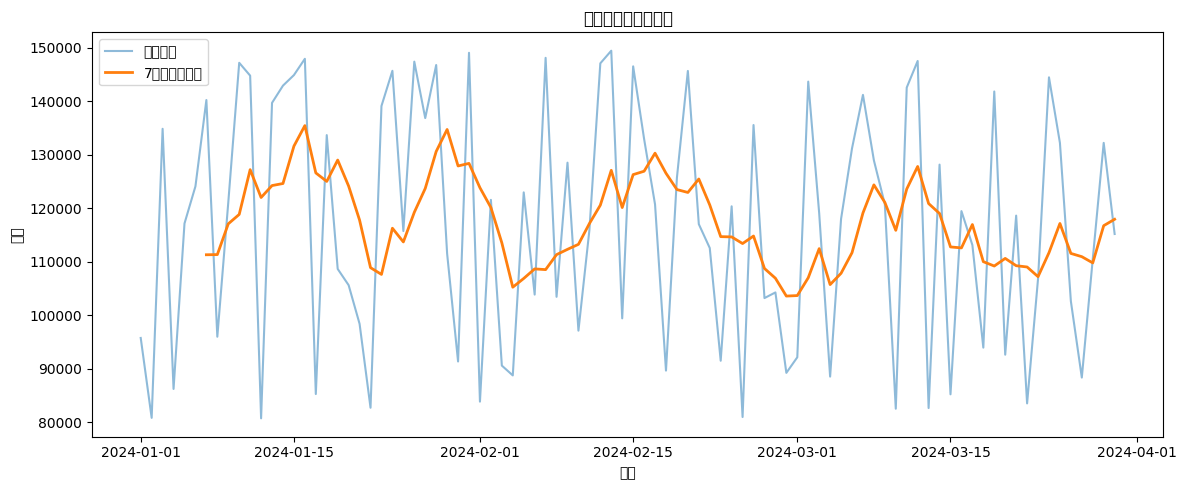

In [40]:
# 問題 9 の解答
print("=== 問題 9: 時系列データ ===")

np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=90, freq='D')
daily_sales = pd.DataFrame({
    '日付': dates,
    '売上': np.random.randint(80000, 150000, 90)
})
daily_sales = daily_sales.set_index('日付')

# 1. 週次リサンプリング
print("週次売上:")
print(daily_sales.resample('W').sum().head())

# 2. 月次リサンプリング
print("\n月次売上:")
print(daily_sales.resample('ME').agg(['sum', 'mean']))

# 3. 7日間移動平均
daily_sales['移動平均7日'] = daily_sales['売上'].rolling(window=7).mean()

# 4. 可視化
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales['売上'], alpha=0.5, label='日次売上')
plt.plot(daily_sales.index, daily_sales['移動平均7日'], label='7日間移動平均', linewidth=2)
plt.xlabel('日付')
plt.ylabel('売上')
plt.title('売上推移と移動平均')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# 問題 10 の解答
print("=== 問題 10: apply と cut ===")

employees = pd.DataFrame({
    '名前': ['田中', '佐藤', '鈴木', '高橋', '伊藤', '渡辺'],
    '年齢': [25, 32, 45, 28, 55, 38],
    '年収': [350, 480, 720, 400, 850, 550]
})

# 1. apply で単位変換
employees['年収_千円'] = employees['年収'].apply(lambda x: x * 10)

# 2. cut で年代分類
employees['年代'] = pd.cut(employees['年齢'], 
                          bins=[0, 30, 40, 50, 100],
                          labels=['20代', '30代', '40代', '50代以上'])

# 3. qcut で年収3等分
employees['年収区分'] = pd.qcut(employees['年収'], q=3, labels=['低', '中', '高'])

print(employees)

# 4. 年代ごとの平均年収
print("\n年代ごとの平均年収:")
print(employees.groupby('年代')['年収'].mean())

=== 問題 10: apply と cut ===
   名前  年齢   年収  年収_千円     年代 年収区分
0  田中  25  350   3500    20代    低
1  佐藤  32  480   4800    30代    中
2  鈴木  45  720   7200    40代    高
3  高橋  28  400   4000    20代    低
4  伊藤  55  850   8500  50代以上    高
5  渡辺  38  550   5500    30代    中

年代ごとの平均年収:
年代
20代      375.0
30代      515.0
40代      720.0
50代以上    850.0
Name: 年収, dtype: float64


## Matplotlib 中級（問題 11-15）の解答

=== 問題 11: サブプロット ===


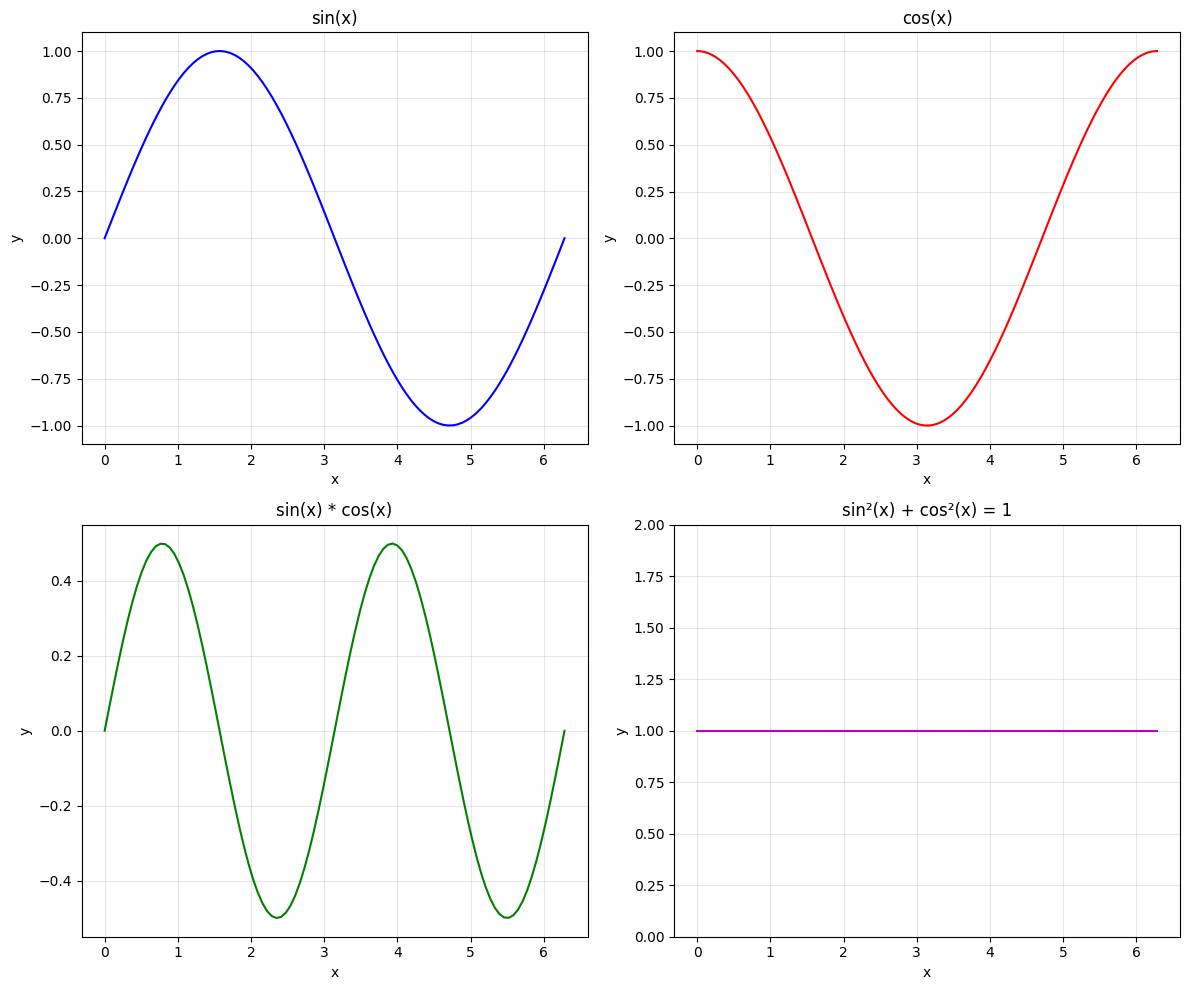

In [42]:
# 問題 11 の解答
print("=== 問題 11: サブプロット ===")

x = np.linspace(0, 2 * np.pi, 100)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 左上: sin(x)
axes[0, 0].plot(x, np.sin(x), 'b-')
axes[0, 0].set_title('sin(x)')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(True, alpha=0.3)

# 右上: cos(x)
axes[0, 1].plot(x, np.cos(x), 'r-')
axes[0, 1].set_title('cos(x)')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].grid(True, alpha=0.3)

# 左下: sin(x) * cos(x)
axes[1, 0].plot(x, np.sin(x) * np.cos(x), 'g-')
axes[1, 0].set_title('sin(x) * cos(x)')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].grid(True, alpha=0.3)

# 右下: sin²(x) + cos²(x)
axes[1, 1].plot(x, np.sin(x)**2 + np.cos(x)**2, 'm-')
axes[1, 1].set_title('sin²(x) + cos²(x) = 1')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_ylim(0, 2)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== 問題 12: GridSpec ===


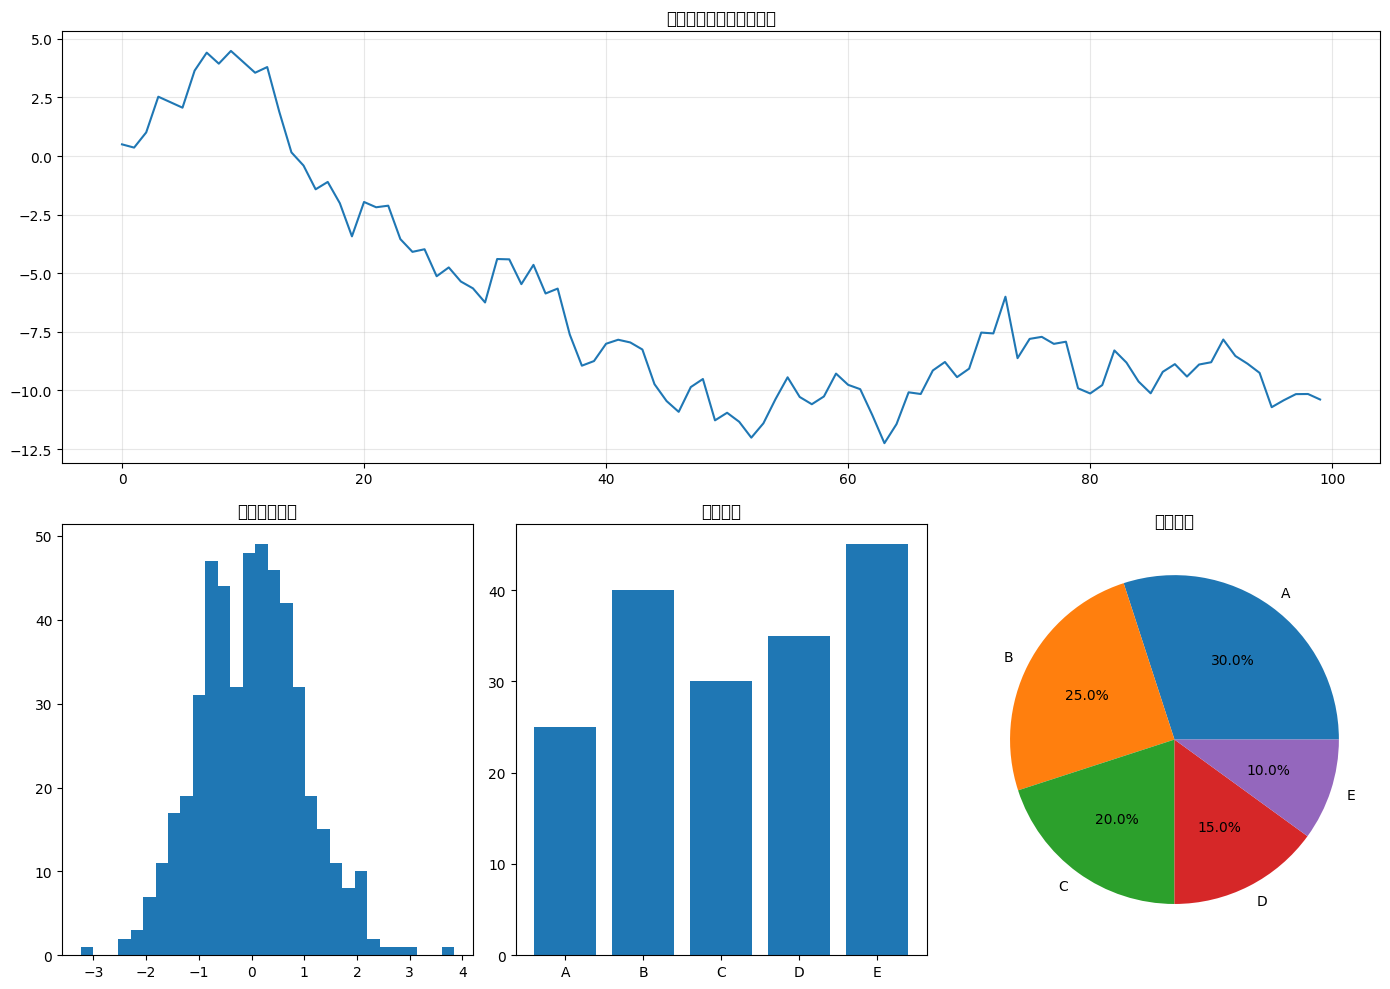

In [43]:
# 問題 12 の解答
print("=== 問題 12: GridSpec ===")

from matplotlib.gridspec import GridSpec

np.random.seed(42)
main_data = np.random.randn(100).cumsum()
hist_data = np.random.randn(500)
bar_data = [25, 40, 30, 35, 45]
pie_data = [30, 25, 20, 15, 10]

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 3, figure=fig)

# 上段: メイングラフ
ax_main = fig.add_subplot(gs[0, :])
ax_main.plot(main_data)
ax_main.set_title('メイングラフ（累積和）')
ax_main.grid(True, alpha=0.3)

# 下段左: ヒストグラム
ax_hist = fig.add_subplot(gs[1, 0])
ax_hist.hist(hist_data, bins=30)
ax_hist.set_title('ヒストグラム')

# 下段中央: 棒グラフ
ax_bar = fig.add_subplot(gs[1, 1])
ax_bar.bar(['A', 'B', 'C', 'D', 'E'], bar_data)
ax_bar.set_title('棒グラフ')

# 下段右: 円グラフ
ax_pie = fig.add_subplot(gs[1, 2])
ax_pie.pie(pie_data, labels=['A', 'B', 'C', 'D', 'E'], autopct='%1.1f%%')
ax_pie.set_title('円グラフ')

plt.tight_layout()
plt.show()

=== 問題 13: 2軸グラフ ===


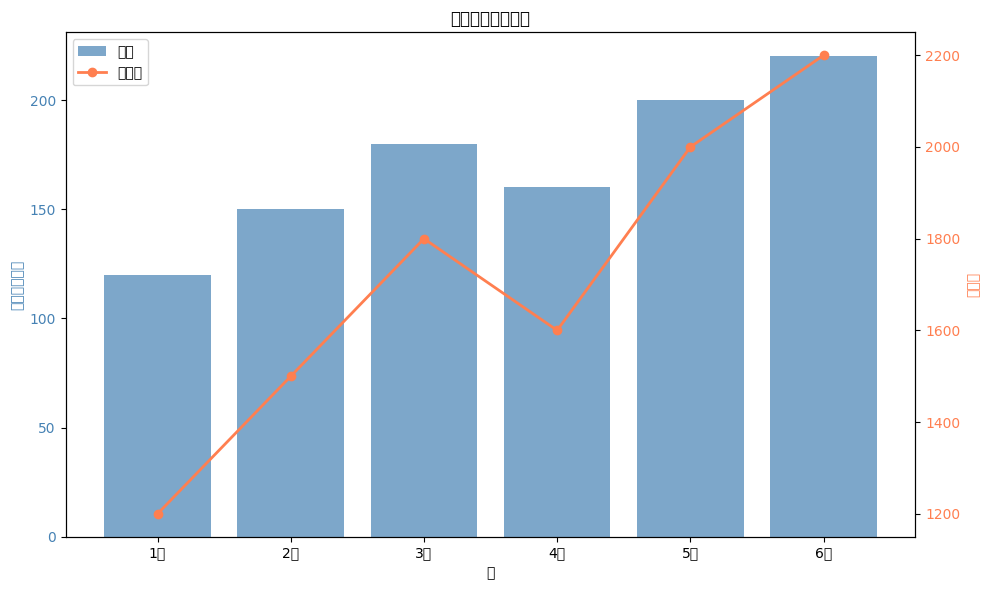

In [44]:
# 問題 13 の解答
print("=== 問題 13: 2軸グラフ ===")

months = ['1月', '2月', '3月', '4月', '5月', '6月']
sales = [120, 150, 180, 160, 200, 220]
visitors = [1200, 1500, 1800, 1600, 2000, 2200]

fig, ax1 = plt.subplots(figsize=(10, 6))

# 左y軸: 売上（棒グラフ）
color1 = 'steelblue'
ax1.bar(months, sales, color=color1, alpha=0.7, label='売上')
ax1.set_xlabel('月')
ax1.set_ylabel('売上（万円）', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# 右y軸: 来客数（折れ線）
ax2 = ax1.twinx()
color2 = 'coral'
ax2.plot(months, visitors, color=color2, marker='o', linewidth=2, label='来客数')
ax2.set_ylabel('来客数', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# 凡例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('月別売上と来客数')
plt.tight_layout()
plt.show()

=== 問題 14: 注釈と装飾 ===


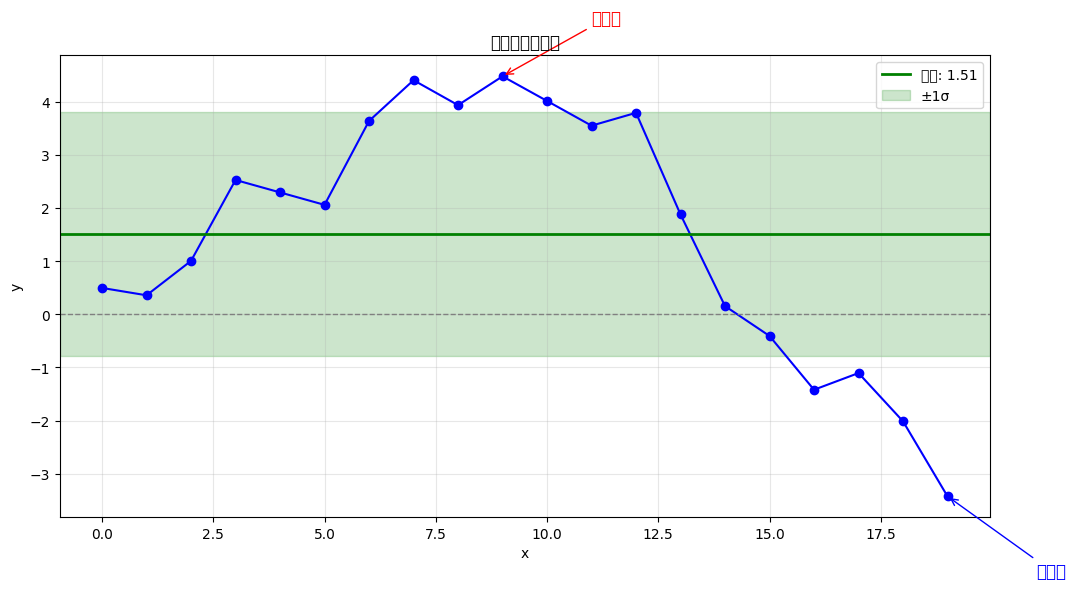

In [45]:
# 問題 14 の解答
print("=== 問題 14: 注釈と装飾 ===")

np.random.seed(42)
x = np.arange(20)
y = np.random.randn(20).cumsum()

fig, ax = plt.subplots(figsize=(12, 6))

# 1. 折れ線グラフ
ax.plot(x, y, 'b-o')

# 2. 最大値の注釈
max_idx = y.argmax()
ax.annotate('最大値', xy=(x[max_idx], y[max_idx]),
            xytext=(x[max_idx] + 2, y[max_idx] + 1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

# 3. 最小値の注釈
min_idx = y.argmin()
ax.annotate('最小値', xy=(x[min_idx], y[min_idx]),
            xytext=(x[min_idx] + 2, y[min_idx] - 1.5),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=12, color='blue')

# 4. y=0 の水平線
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 5. 平均と±1標準偏差
mean_y = y.mean()
std_y = y.std()
ax.axhline(y=mean_y, color='green', linestyle='-', linewidth=2, label=f'平均: {mean_y:.2f}')
ax.axhspan(mean_y - std_y, mean_y + std_y, alpha=0.2, color='green', label='±1σ')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('注釈付きグラフ')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

=== 問題 15: ヒートマップと等高線図 ===


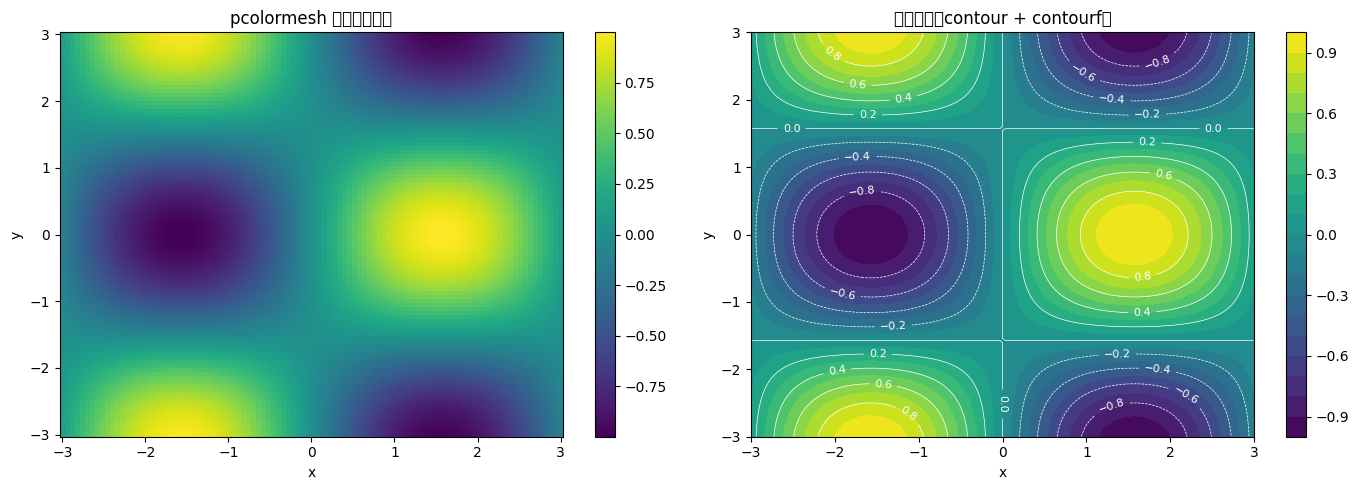

In [46]:
# 問題 15 の解答
print("=== 問題 15: ヒートマップと等高線図 ===")

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: ヒートマップ
pcm = axes[0].pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
axes[0].set_title('pcolormesh ヒートマップ')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
plt.colorbar(pcm, ax=axes[0])

# 右: 等高線図
cf = axes[1].contourf(X, Y, Z, levels=20, cmap='viridis')
cs = axes[1].contour(X, Y, Z, levels=10, colors='white', linewidths=0.5)
axes[1].clabel(cs, inline=True, fontsize=8)
axes[1].set_title('等高線図（contour + contourf）')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.colorbar(cf, ax=axes[1])

plt.tight_layout()
plt.show()

## Seaborn 中級（問題 16-19）の解答

=== 問題 16: FacetGrid ===


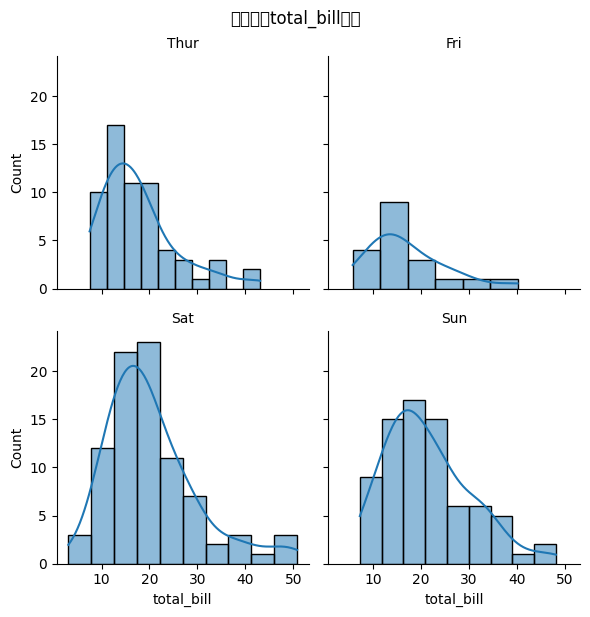

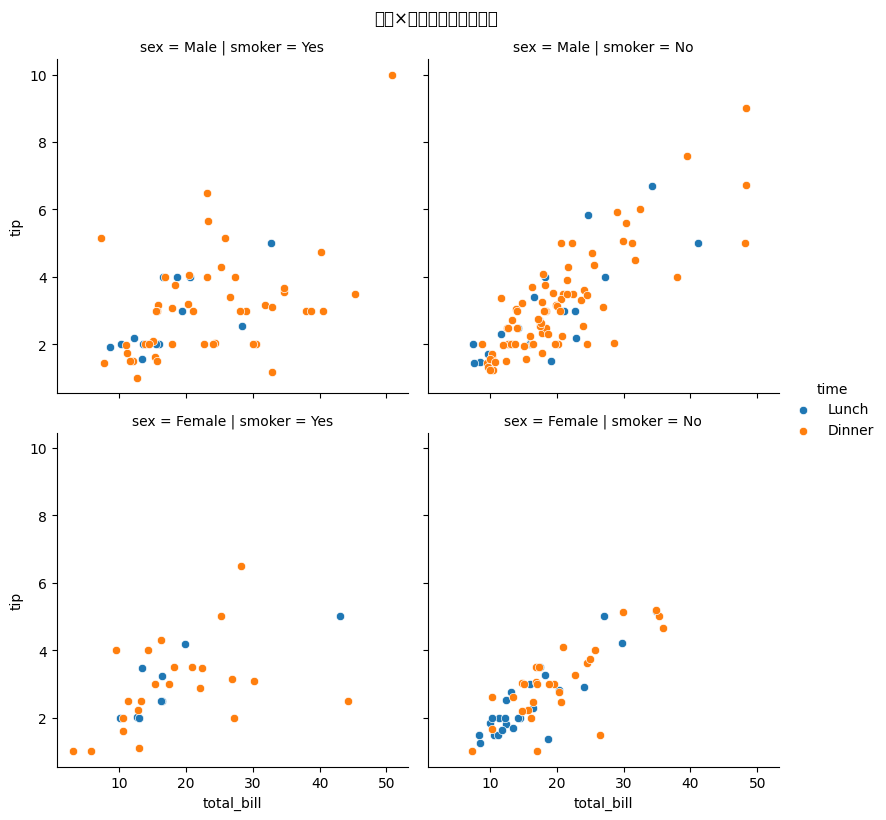

In [47]:
# 問題 16 の解答
print("=== 問題 16: FacetGrid ===")

tips = sns.load_dataset('tips')

# 1. 曜日ごとのヒストグラム
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=3)
g.map(sns.histplot, 'total_bill', kde=True)
g.set_titles('{col_name}')
plt.suptitle('曜日別のtotal_bill分布', y=1.02)
plt.show()

# 2. sex × smoker の散布図
g = sns.FacetGrid(tips, row='sex', col='smoker', hue='time', height=4)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.suptitle('性別×喫煙状況別の散布図', y=1.02)
plt.show()

=== 問題 17: PairGrid と JointGrid ===


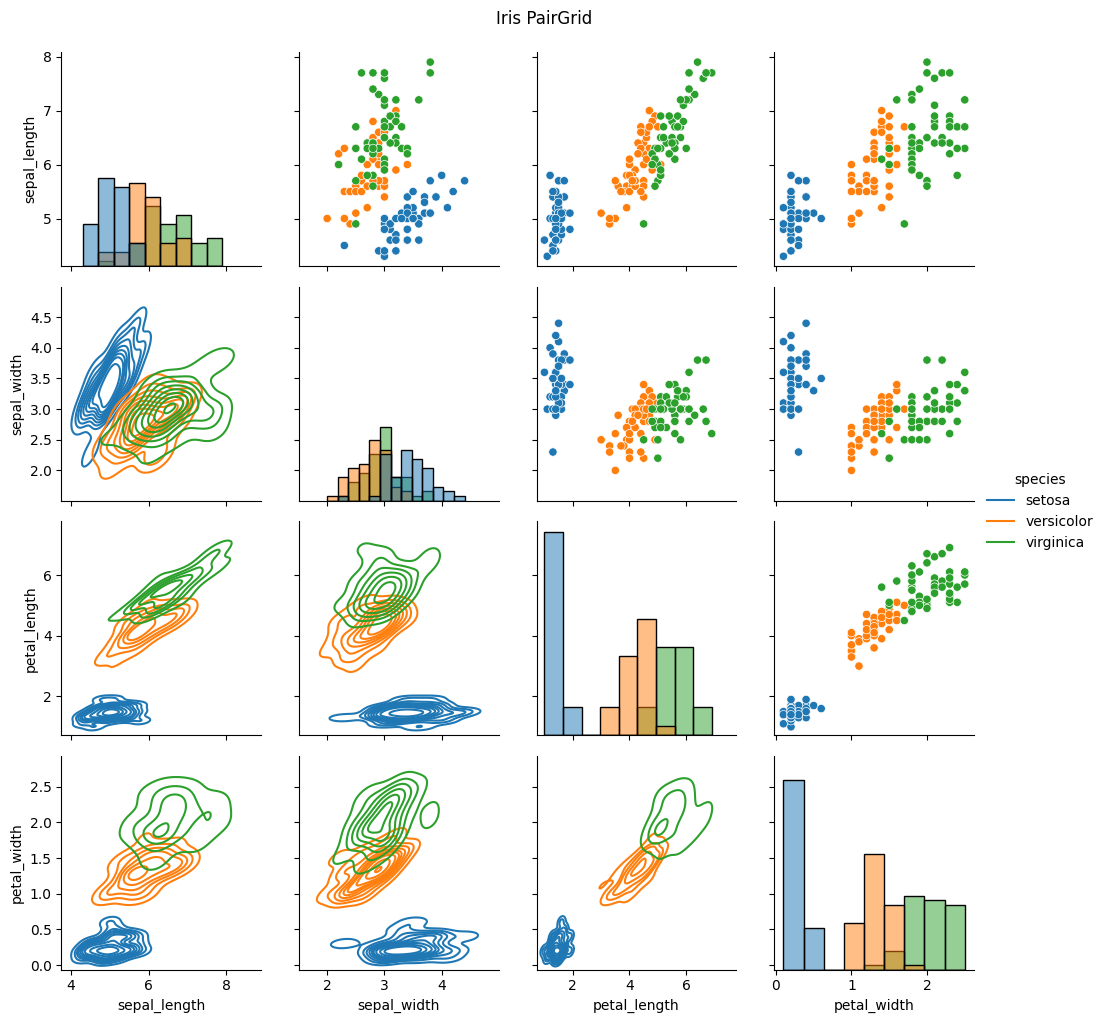

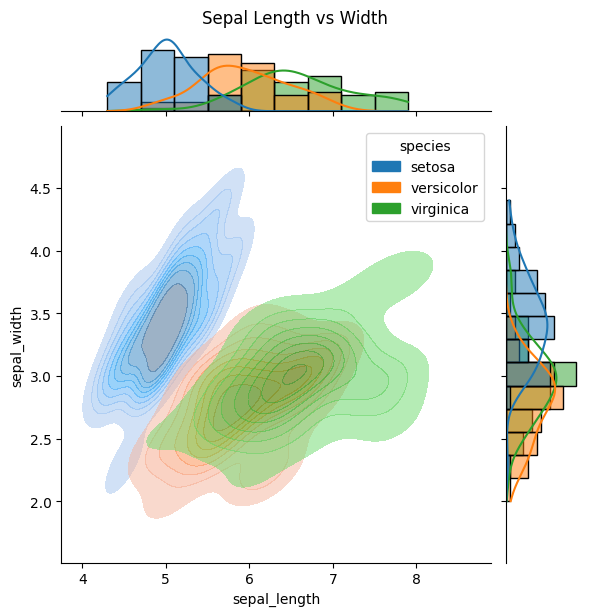

In [48]:
# 問題 17 の解答
print("=== 問題 17: PairGrid と JointGrid ===")

iris = sns.load_dataset('iris')

# 1. PairGrid
g = sns.PairGrid(iris, hue='species', height=2.5)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.suptitle('Iris PairGrid', y=1.02)
plt.show()

# 2. JointGrid
g = sns.JointGrid(data=iris, x='sepal_length', y='sepal_width', hue='species')
g.plot_joint(sns.kdeplot, fill=True, alpha=0.5)
g.plot_marginals(sns.histplot, kde=True)
plt.suptitle('Sepal Length vs Width', y=1.02)
plt.show()

=== 問題 18: 統計的推定の可視化 ===


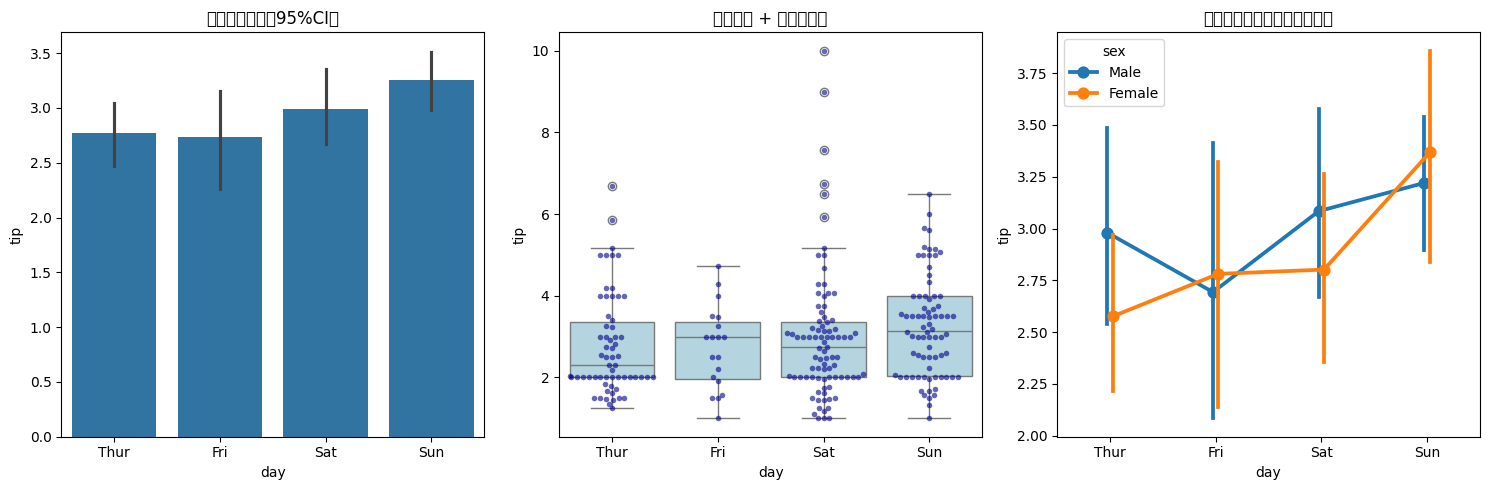

In [49]:
# 問題 18 の解答
print("=== 問題 18: 統計的推定の可視化 ===")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 棒グラフ（信頼区間付き）
sns.barplot(data=tips, x='day', y='tip', ax=axes[0])
axes[0].set_title('曜日別チップ（95%CI）')

# 2. 箱ひげ図 + スウォーム
sns.boxplot(data=tips, x='day', y='tip', ax=axes[1], color='lightblue')
sns.swarmplot(data=tips, x='day', y='tip', ax=axes[1], color='darkblue', size=4, alpha=0.6)
axes[1].set_title('箱ひげ図 + スウォーム')

# 3. pointplot
sns.pointplot(data=tips, x='day', y='tip', hue='sex', dodge=True, ax=axes[2])
axes[2].set_title('ポイントプロット（性別別）')

plt.tight_layout()
plt.show()

=== 問題 19: ヒートマップ ===


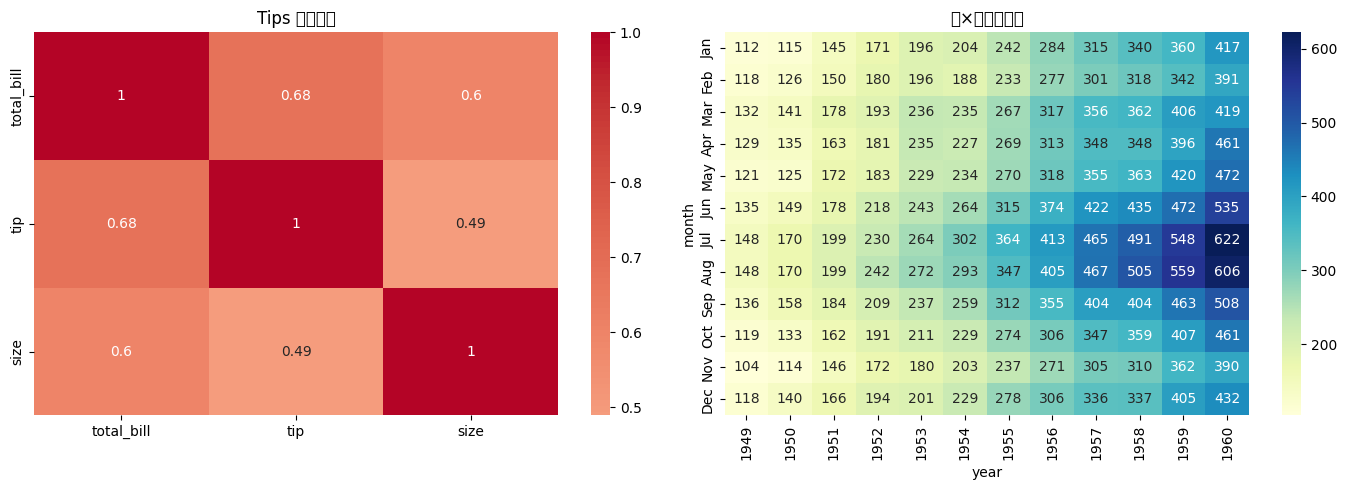

In [50]:
# 問題 19 の解答
print("=== 問題 19: ヒートマップ ===")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. tips の相関行列
tips_numeric = tips.select_dtypes(include=[np.number])
corr = tips_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Tips 相関行列')

# 2. flights のピボットヒートマップ
flights = sns.load_dataset('flights')
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(flights_pivot, cmap='YlGnBu', annot=True, fmt='d', ax=axes[1])
axes[1].set_title('月×年の乗客数')

plt.tight_layout()
plt.show()

## SciPy 統計（問題 20-24）の解答

=== 問題 20: t検定 ===
対照群平均: 68.12
処理群平均: 73.55
t統計量: -2.0720
p値: 0.0427
結論: 有意差あり

Welch t検定: t=-2.0720, p=0.0429


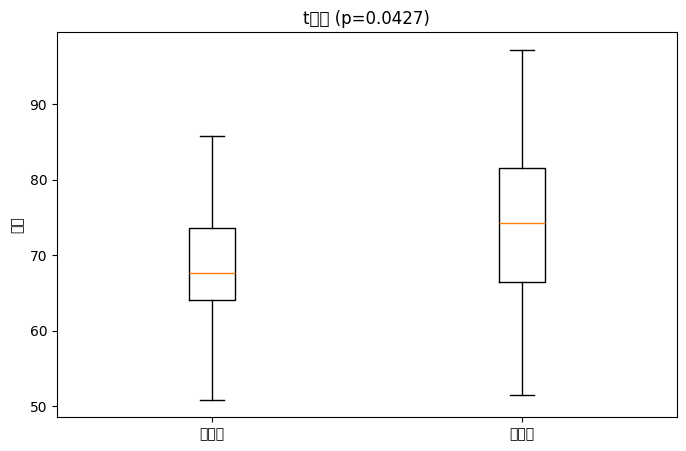

In [51]:
# 問題 20 の解答
print("=== 問題 20: t検定 ===")

np.random.seed(42)
control = np.random.normal(70, 10, 30)
treatment = np.random.normal(75, 12, 30)

# 1. 独立2標本t検定
t_stat, p_value = stats.ttest_ind(control, treatment)
print(f"対照群平均: {control.mean():.2f}")
print(f"処理群平均: {treatment.mean():.2f}")
print(f"t統計量: {t_stat:.4f}")
print(f"p値: {p_value:.4f}")
print(f"結論: {'有意差あり' if p_value < 0.05 else '有意差なし'}")

# 2. Welch のt検定
t_welch, p_welch = stats.ttest_ind(control, treatment, equal_var=False)
print(f"\nWelch t検定: t={t_welch:.4f}, p={p_welch:.4f}")

# 3. 可視化
plt.figure(figsize=(8, 5))
plt.boxplot([control, treatment], labels=['対照群', '処理群'])
plt.ylabel('点数')
plt.title(f't検定 (p={p_value:.4f})')
plt.show()

=== 問題 21: 対応のあるt検定 ===
訓練前平均: 48.63
訓練後平均: 52.83
t統計量: 6.4709
p値: 0.000003

差の平均: 4.20
95%信頼区間: (2.84, 5.56)


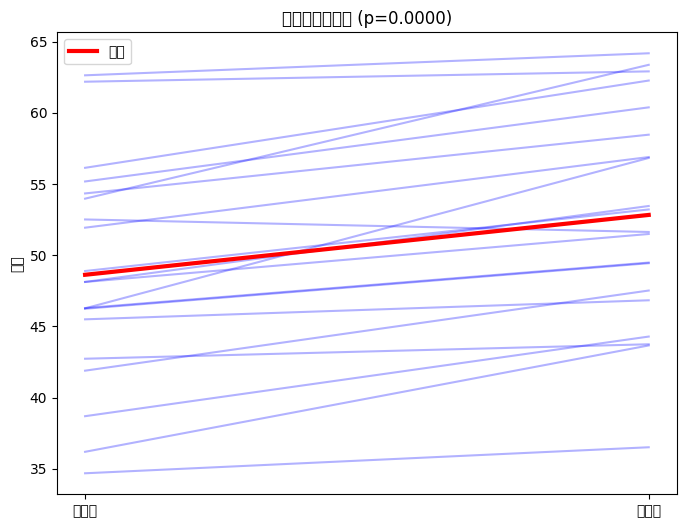

In [52]:
# 問題 21 の解答
print("=== 問題 21: 対応のあるt検定 ===")

np.random.seed(42)
before = np.random.normal(50, 8, 20)
after = before + np.random.normal(5, 3, 20)

# 1. 対応のあるt検定
t_stat, p_value = stats.ttest_rel(after, before)
print(f"訓練前平均: {before.mean():.2f}")
print(f"訓練後平均: {after.mean():.2f}")
print(f"t統計量: {t_stat:.4f}")
print(f"p値: {p_value:.6f}")

# 2. 差の信頼区間
diff = after - before
ci = stats.t.interval(0.95, df=len(diff)-1, loc=diff.mean(), scale=stats.sem(diff))
print(f"\n差の平均: {diff.mean():.2f}")
print(f"95%信頼区間: ({ci[0]:.2f}, {ci[1]:.2f})")

# 3. 可視化
plt.figure(figsize=(8, 6))
for i in range(len(before)):
    plt.plot([0, 1], [before[i], after[i]], 'b-', alpha=0.3)
plt.plot([0, 1], [before.mean(), after.mean()], 'r-', linewidth=3, label='平均')
plt.xticks([0, 1], ['訓練前', '訓練後'])
plt.ylabel('点数')
plt.title(f'訓練前後の変化 (p={p_value:.4f})')
plt.legend()
plt.show()

In [53]:
# 問題 22 の解答
print("=== 問題 22: カイ二乗検定 ===")

observed = np.array([
    [50, 30, 20],
    [30, 45, 25]
])

# 1. カイ二乗独立性検定
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("観測度数:")
print(pd.DataFrame(observed, index=['男性', '女性'], columns=['製品A', '製品B', '製品C']))

# 2. 期待度数
print("\n期待度数:")
print(pd.DataFrame(expected.round(1), index=['男性', '女性'], columns=['製品A', '製品B', '製品C']))

# 3. 結果
print(f"\nχ²統計量: {chi2:.4f}")
print(f"自由度: {dof}")
print(f"p値: {p_value:.4f}")
print(f"結論: {'性別と製品選好に関連あり' if p_value < 0.05 else '独立（関連なし）'}")

=== 問題 22: カイ二乗検定 ===
観測度数:
    製品A  製品B  製品C
男性   50   30   20
女性   30   45   25

期待度数:
     製品A   製品B   製品C
男性  40.0  37.5  22.5
女性  40.0  37.5  22.5

χ²統計量: 8.5556
自由度: 2
p値: 0.0139
結論: 性別と製品選好に関連あり


=== 問題 23: 相関分析 ===
ピアソン相関: r=0.9404, p=0.000000
スピアマン相関: ρ=0.9402, p=0.000000


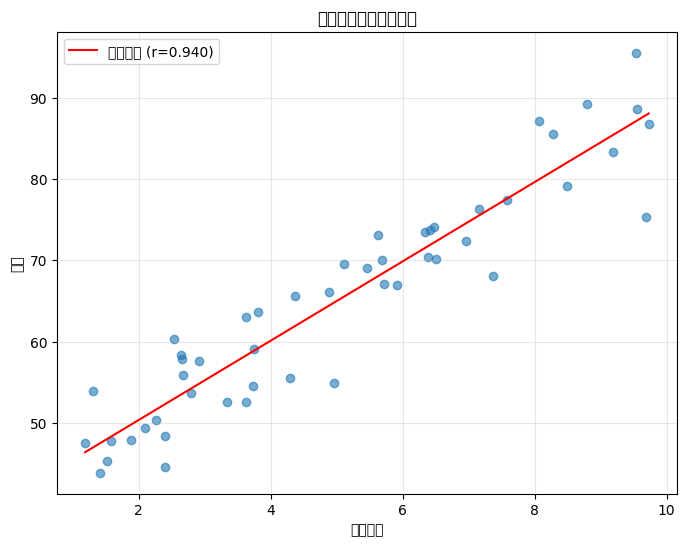

In [54]:
# 問題 23 の解答
print("=== 問題 23: 相関分析 ===")

np.random.seed(42)
n = 50
study_hours = np.random.uniform(1, 10, n)
scores = 40 + 5 * study_hours + np.random.normal(0, 5, n)

# 1. ピアソン相関
r_pearson, p_pearson = stats.pearsonr(study_hours, scores)
print(f"ピアソン相関: r={r_pearson:.4f}, p={p_pearson:.6f}")

# 2. スピアマン相関
r_spearman, p_spearman = stats.spearmanr(study_hours, scores)
print(f"スピアマン相関: ρ={r_spearman:.4f}, p={p_spearman:.6f}")

# 3. 可視化
plt.figure(figsize=(8, 6))
plt.scatter(study_hours, scores, alpha=0.6)

# 回帰直線
z = np.polyfit(study_hours, scores, 1)
p = np.poly1d(z)
x_line = np.linspace(study_hours.min(), study_hours.max(), 100)
plt.plot(x_line, p(x_line), 'r-', label=f'回帰直線 (r={r_pearson:.3f})')

plt.xlabel('勉強時間')
plt.ylabel('点数')
plt.title('勉強時間と点数の相関')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== 問題 24: 一元配置分散分析 ===
各群の平均: A=68.36, B=72.13, C=81.06
F統計量: 11.6154
p値: 0.000042
効果量 η²: 0.2439


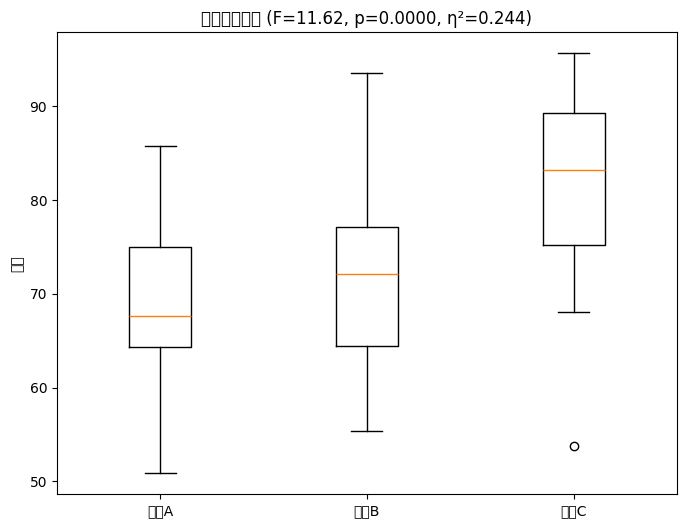


結論: 群間に有意差あり
効果の大きさ: 大


In [55]:
# 問題 24 の解答
print("=== 問題 24: 一元配置分散分析 ===")

np.random.seed(42)
method_a = np.random.normal(70, 10, 25)
method_b = np.random.normal(75, 10, 25)
method_c = np.random.normal(80, 10, 25)

# 1. ANOVA
f_stat, p_value = stats.f_oneway(method_a, method_b, method_c)
print(f"各群の平均: A={method_a.mean():.2f}, B={method_b.mean():.2f}, C={method_c.mean():.2f}")
print(f"F統計量: {f_stat:.4f}")
print(f"p値: {p_value:.6f}")

# 2. 効果量（η²）
all_data = np.concatenate([method_a, method_b, method_c])
grand_mean = all_data.mean()
ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in [method_a, method_b, method_c])
ss_total = sum((x - grand_mean)**2 for x in all_data)
eta_squared = ss_between / ss_total
print(f"効果量 η²: {eta_squared:.4f}")

# 3. 可視化
plt.figure(figsize=(8, 6))
plt.boxplot([method_a, method_b, method_c], labels=['方法A', '方法B', '方法C'])
plt.ylabel('点数')
plt.title(f'教授法の比較 (F={f_stat:.2f}, p={p_value:.4f}, η²={eta_squared:.3f})')
plt.show()

# 4. 解釈
print(f"\n結論: {'群間に有意差あり' if p_value < 0.05 else '有意差なし'}")
print(f"効果の大きさ: {'大' if eta_squared >= 0.14 else '中' if eta_squared >= 0.06 else '小'}")

## Scikit-learn 中級（問題 25-30）の解答

=== 問題 25: ランダムフォレスト ===


正解率: 1.0000


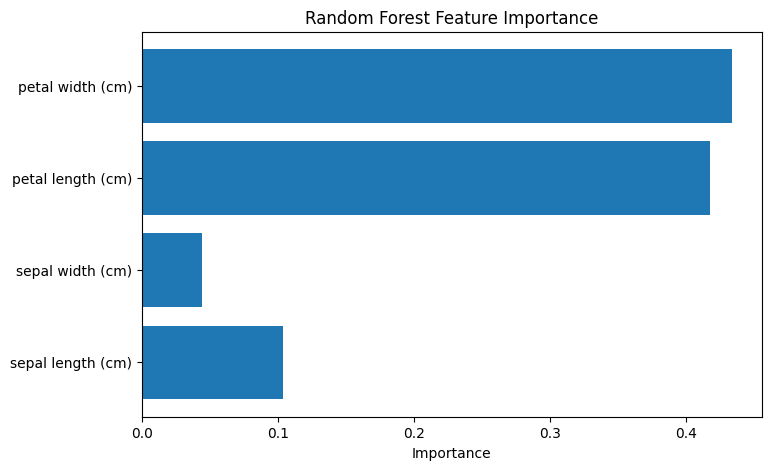

In [56]:
# 問題 25 の解答
print("=== 問題 25: ランダムフォレスト ===")

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

# 1. データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. ランダムフォレスト
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. 正解率
y_pred = rf.predict(X_test)
print(f"正解率: {accuracy_score(y_test, y_pred):.4f}")

# 4. 特徴量重要度
plt.figure(figsize=(8, 5))
plt.barh(iris_data.feature_names, rf.feature_importances_)
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [57]:
# 問題 26 の解答
print("=== 問題 26: グリッドサーチ ===")

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# パラメータグリッド
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# グリッドサーチ
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"最良パラメータ: {grid_search.best_params_}")
print(f"最良CVスコア: {grid_search.best_score_:.4f}")

# テストデータで評価
test_score = grid_search.score(X_test, y_test)
print(f"テスト正解率: {test_score:.4f}")

=== 問題 26: グリッドサーチ ===


最良パラメータ: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
最良CVスコア: 0.9619
テスト正解率: 1.0000


In [58]:
# 問題 27 の解答
print("=== 問題 27: パイプライン ===")

from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

wine_data = load_wine()
X, y = wine_data.data, wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# パイプライン作成
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('clf', LogisticRegression(max_iter=1000))
])

# 学習・予測
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)

print(f"正解率: {accuracy:.4f}")
print(f"パイプラインステップ: {[step[0] for step in pipeline.steps]}")

=== 問題 27: パイプライン ===
正解率: 0.9815
パイプラインステップ: ['scaler', 'pca', 'clf']


=== 問題 28: K-means クラスタリング ===


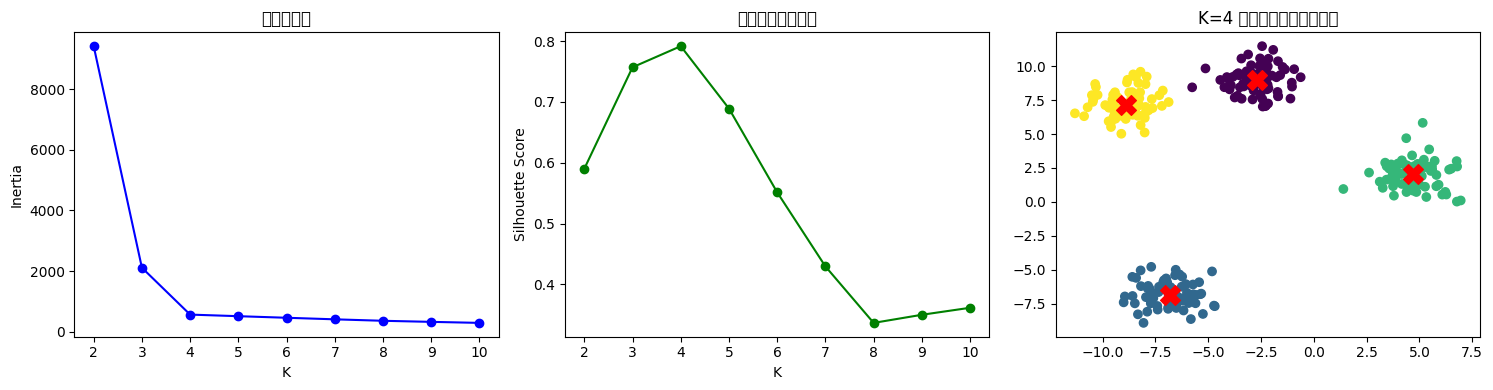

In [59]:
# 問題 28 の解答
print("=== 問題 28: K-means クラスタリング ===")

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# エルボー法とシルエットスコア
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# エルボー法
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')
axes[0].set_title('エルボー法')

# シルエットスコア
axes[1].plot(K_range, silhouette_scores, 'go-')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('シルエットスコア')

# K=4 でのクラスタリング結果
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_cluster)
axes[2].scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels, cmap='viridis')
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200)
axes[2].set_title('K=4 のクラスタリング結果')

plt.tight_layout()
plt.show()

=== 問題 29: PCA ===
各主成分の寄与率:
  PC1: 0.7296
  PC2: 0.2285
  PC3: 0.0367
  PC4: 0.0052

累積寄与率95%以上: 2成分


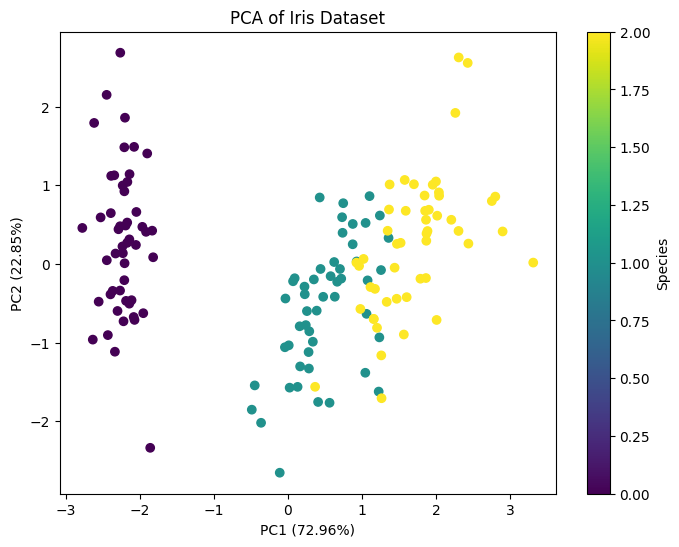

In [60]:
# 問題 29 の解答
print("=== 問題 29: PCA ===")

from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

# 1. 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("各主成分の寄与率:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {ratio:.4f}")

# 3. 95%以上になる主成分数
cumsum = pca.explained_variance_ratio_.cumsum()
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\n累積寄与率95%以上: {n_components_95}成分")

# 4. 2次元プロット
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter, label='Species')
plt.show()

=== 問題 30: アンサンブル手法の比較 ===
Decision Tree: 0.8654 (+/- 0.0440)


Random Forest: 0.9721 (+/- 0.0176)


Gradient Boosting: 0.9386 (+/- 0.0321)


AdaBoost: 0.9278 (+/- 0.0648)


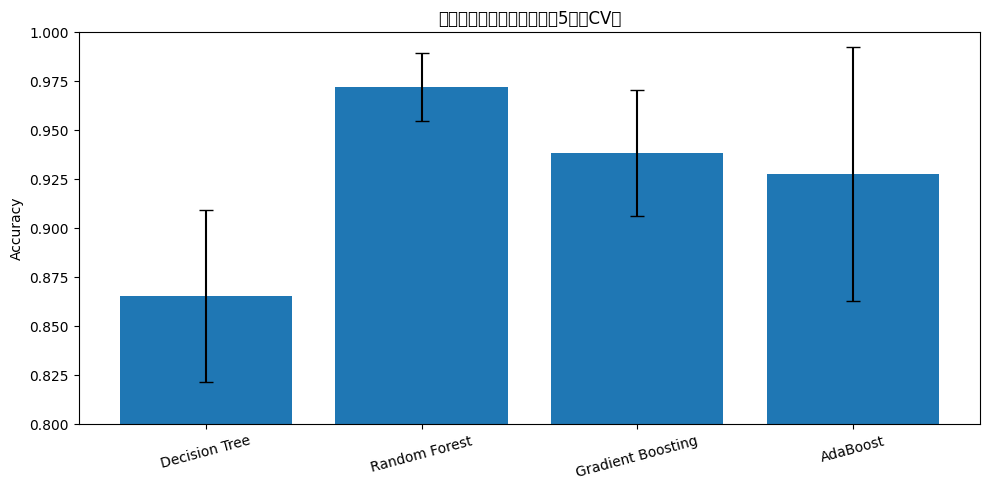

In [61]:
# 問題 30 の解答
print("=== 問題 30: アンサンブル手法の比較 ===")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

wine = load_wine()
X, y = wine.data, wine.target

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[name] = {'mean': scores.mean(), 'std': scores.std()}
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

# 可視化
names = list(results.keys())
means = [results[n]['mean'] for n in names]
stds = [results[n]['std'] for n in names]

plt.figure(figsize=(10, 5))
plt.bar(names, means, yerr=stds, capsize=5)
plt.ylabel('Accuracy')
plt.title('アンサンブル手法の比較（5分割CV）')
plt.xticks(rotation=15)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

---
## お疲れ様でした！

30問すべて解き終わりましたか？  
わからなかった問題は、対応する中級チュートリアルに戻って復習してみましょう。

### 各トピックのチュートリアル
- NumPy 中級: `numpy_intermediate_tutorial.ipynb`
- Pandas 中級: `pandas_intermediate_tutorial.ipynb`
- Matplotlib 中級: `matplotlib_intermediate_tutorial.ipynb`
- Seaborn 中級: `seaborn_intermediate_tutorial.ipynb`
- SciPy 統計 中級: `scipy_stats_intermediate_tutorial.ipynb`
- Scikit-learn 中級: `sklearn_intermediate_tutorial.ipynb`